In [2]:
import codecs
f = codecs.open('text.txt', 'r', 'utf-8')
data = f.read()

In [3]:
import re
def filtr(data):  
    reg = re.compile('[^а-яА-ЯёЁ]')
    data = reg.sub('', data)
    data = data.lower()
    data = data.replace('ё', 'е')
    return data

In [4]:
data = filtr(data)

In [5]:
def encrypt(data, key):
    k = 0
    res = ''
    for s in data:
        n = ord(s) + ord(key[k%len(key)]) - 1072*2
        res += chr(n%32 + 1072)
        k += 1
    return res

In [6]:
key2 = encrypt(data, 'ок')
key3 = encrypt(data, 'кот')
key4 = encrypt(data, 'окно')
key5 = encrypt(data, 'каток')
key12 = encrypt(data, 'шифровальщик')

In [7]:
def confind (data):
    i = 0
    d = {}
    d = dict.fromkeys(data, 0)
    for symb in data:
        d[symb] += 1
    for key in d:
        i += d[key]*(d[key]-1)
    i /= len(data)*(len(data)-1)
    return i

In [8]:
d = confind(data)
d2 = confind(key2)
d3 = confind(key3)
d4 = confind(key4)
d5 = confind(key5)
d12 = confind(key12)

In [9]:
print(d)
print(d2)
print(d3)
print(d4)
print(d5)
print(d12)

0.058205120003411916
0.04585825629871307
0.041945217456204886
0.04452014628581177
0.03809615200076768
0.03184808453016878


Расшифровка текста из варианта

In [10]:
f2 = codecs.open('encrypted.txt', 'r', 'utf-8')
text = f2.read()

In [11]:
text = filtr(text)

In [12]:
def period(data):
    conf=[]
    for r in range (2, 31):
        i = 0
        sum = 0
        for i in range (r):
            sl = data[i::r]
            sum+=confind(sl)
        conf.append(sum/r)
        print('{}: {}'.format(r, sum/r))
    return conf

In [13]:
indexes =period(text)

2: 0.03287753867743487
3: 0.035514731636041075
4: 0.03286069917884858
5: 0.03895311386489468
6: 0.03554998629687604
7: 0.032811597918655386
8: 0.03286383462780904
9: 0.03553371007848463
10: 0.039067157276406375
11: 0.0328816224310756
12: 0.035519540811583844
13: 0.032756478213088844
14: 0.0327225345585854
15: 0.054124528325143445
16: 0.03280807623186673
17: 0.03284903154120664
18: 0.03557346541839013
19: 0.03259467863619295
20: 0.039074228463814364
21: 0.03521958910238
22: 0.03294980112336163
23: 0.03295411376697907
24: 0.03541821786463308
25: 0.03895466753126693
26: 0.0328507548442532
27: 0.035261236335872005
28: 0.03253072566859217
29: 0.03256384657889128
30: 0.054126075651830925


In [14]:
import matplotlib.pyplot as plt

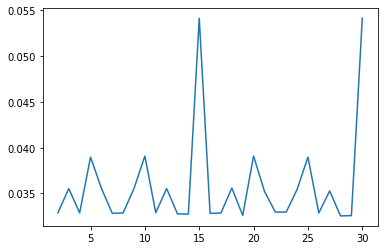

In [15]:
y = []
for i in range(2, 31):
    y.append(i)
plt.plot(y, indexes)

In [16]:
def mostfreq(data):
    d = {}
    d = dict.fromkeys(data, 0)
    for symb in data:
        d[symb] += 1
    s = ''
    max_freq = max(d.values())
    for key in d:
        if(d[key]==max_freq):
            s = key
            break
    return s

In [17]:
def getkey(data, r):
    keyo, keye, keya, keyi = "", "", "", ""
    for i in range(r):
        sl = data[i::r]
        keyo += chr(((ord(mostfreq(sl))) - ord('о'))%32 + 1072)
        keye += chr(((ord(mostfreq(sl))) - ord('е'))%32 + 1072)
        keya += chr(((ord(mostfreq(sl))) - ord('а'))%32 + 1072)
        keyi += chr(((ord(mostfreq(sl))) - ord('и'))%32 + 1072)
    return [keyo, keye, keya, keyi]

In [18]:
keys = getkey(text, 15)

In [19]:
for i in keys:
    print(i)

крадущяйгявтени
ущйньвитмилыоцс
шюотбзнчснрауыц
рцжкщяепйеишлуо


In [20]:
def decrypt(data, r, key):
    plaintext = ""
    i=0
    for s in data:
        plaintext += chr(((ord(s) - ord(key[i%r])))%32 + 1072)
        i+=1
    return plaintext

In [21]:
plaintext = decrypt(text, 15, "крадущийсявтени")
plaintext

'тихотактихочтослышнокакмотылькицепляютсяхрупкимикрылышкамизаночнуюпрохладупораужеотправлятьсяпосвоимделамстражадавнопрошланоясегоднячтотослишкомосторожничаюнекоенеобъяснимоечувствозаставляетменязадержатьсявозлестенызданияпогруженноговтеньтеньмояподругамоялюбовницамоянапарницаяпрячусьвтенияживувнейтолькоонавсегдаготовапринятьменяспастиотстрелзлобносверкающихвлуннойночиклинковилиоткровожадныхзолотыхглаздемоновтенькакговоритдобрыйжрецсаготабратфоркогдахватитлишкувовремянашихредкихвстречтеньявляетсясестройтьмыаоттьмынедалекоидоненазываемогочушьненазываемыйитьмаабсолютноразныевещиэтовсеравночтосравниватьограивеликанатеньэтожизньтеньэтосвободатеньэтоденьгитеньэтовластьтеньэторепутацияужгарреттеньзнаетобэтомнепонаслышкетеньпоявляетсятолькотогдакогдасуществуетхотябыкрупицасветатакчтосравниватьеестьмойпоменьшеймереглупономоемустаромуучителюяестественноэтонеговорюяйцакурицунеучатнаузкойночнойулочкескаменнымидомамизаставшимитихиевременанераздавалосьнизвукалишьпоскрипывалажестянаявывесканадлавкой

In [22]:
freq6 = mostfreq(plaintext[6::15])
freq8 = mostfreq(plaintext[8::15])

In [23]:
print(freq6)
print(freq8)

е
а
